#Модуль 10

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [35]:
df_frod = pd.read_csv('frod_table.csv')
df_frod

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,910643,interest,150029,0.0,Android,search,1.5
1,910643,interest,150029,0.0,Android,search,1.5
2,910643,interest,150029,0.0,iOS,search,1.5
3,910643,interest,150029,0.0,iOS,search,1.5
4,910643,interest,150029,0.0,iOS,search,1.5
...,...,...,...,...,...,...,...
3202008,153440,intent,217701,0.0,Android,organic,0.0
3202009,153440,intent,217701,0.0,Android,organic,0.0
3202010,153440,intent,217701,0.0,Android,organic,0.0
3202011,153440,intent,217701,0.0,Android,organic,0.0


In [36]:
df_new = pd.read_csv('df_new.csv')
df_new

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,111649,consideration,150000,0.0,Android,video,0.75
1,108759,interest,150000,0.0,Android,banner,0.50
2,991236,interest,150000,0.0,Android,native,2.00
3,387356,interest,150000,0.0,iOS,search,1.50
4,619571,consideration,150000,0.0,iOS,search,1.50
...,...,...,...,...,...,...,...
643689,929180,intent,224682,0.0,iOS,search,1.50
643690,1034498,intent,225430,0.0,iOS,search,1.50
643691,947521,consideration,225482,0.0,Android,organic,0.00
643692,720354,purchase,225495,50.0,Android,organic,0.00


##Гистограмма распределения количества этапов воронки, которые были скомпрометированы.

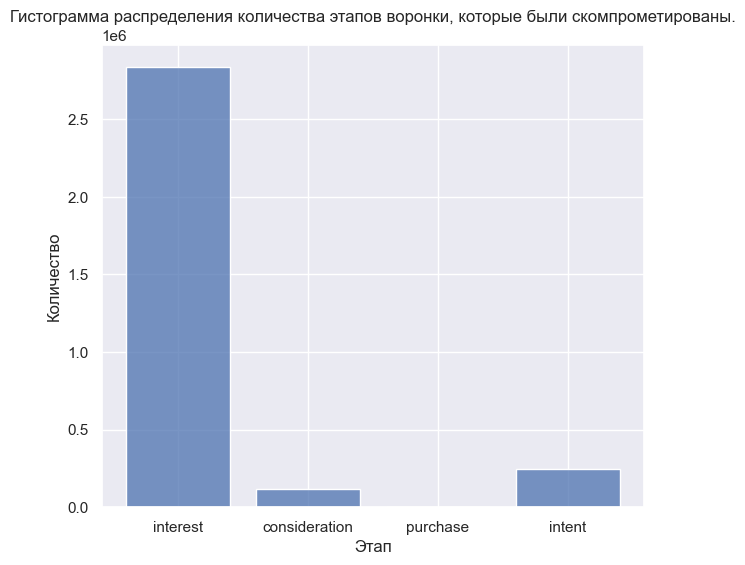

In [37]:
plt.figure(figsize=(7,6))
sns.histplot(df_frod['funnel_stage'], shrink=.8)
plt.title('Гистограмма распределения количества этапов воронки, которые были скомпрометированы.', fontsize=12)
plt.xlabel('Этап')
plt.ylabel('Количество')
plt.show()

Почему в основном именно эти этапы были скомпрометированы?

Потому что для подделки этапов интереса и рассмотрения нужно намного меньше времени и ресурсов, чем на подделку остальных этапов. Достаточно просто кликнуть по рекламе и полистать сайт. Intent сделать не так просто как тот же интерес, нужно зарегестрироваться или оставить заявку. Но мы наблюдаем, что и на нем есть небольшое колиечство скомпрометированных данных. Небольшое оно, как раз таки потому что на это нужно намного больше времени и ресурсов

##Воронки продаж по всем каналам коммуникации с клиентом

In [38]:
df_new

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,111649,consideration,150000,0.0,Android,video,0.75
1,108759,interest,150000,0.0,Android,banner,0.50
2,991236,interest,150000,0.0,Android,native,2.00
3,387356,interest,150000,0.0,iOS,search,1.50
4,619571,consideration,150000,0.0,iOS,search,1.50
...,...,...,...,...,...,...,...
643689,929180,intent,224682,0.0,iOS,search,1.50
643690,1034498,intent,225430,0.0,iOS,search,1.50
643691,947521,consideration,225482,0.0,Android,organic,0.00
643692,720354,purchase,225495,50.0,Android,organic,0.00


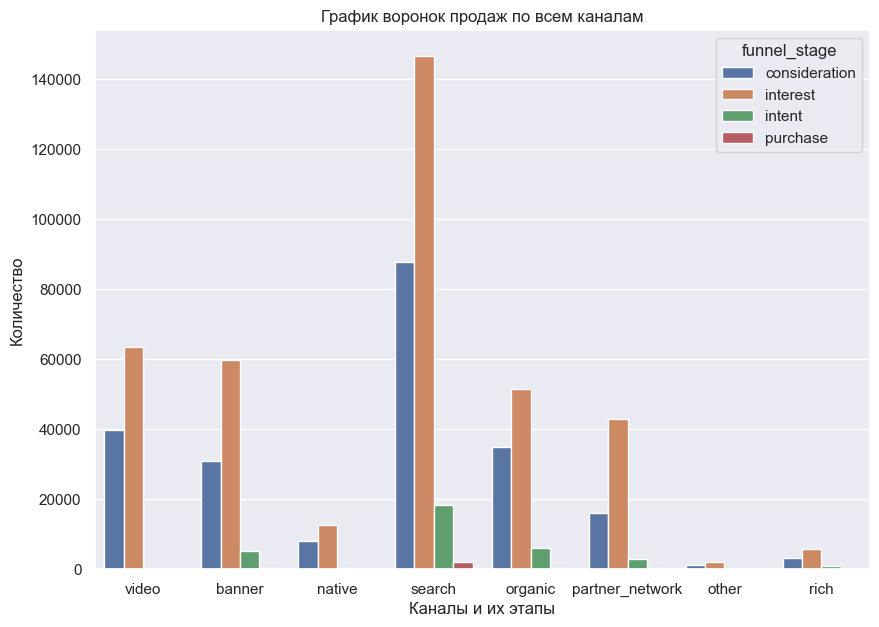

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_new, x='ad_channel', hue='funnel_stage')
plt.title('График воронок продаж по всем каналам')
plt.xlabel('Каналы и их этапы')
plt.ylabel('Количество')
plt.show()

Наименее перспективным каналом мне кажется канал  "rich", так же канал "video" практически не имеет purchases(покупок), что тоже говорит о неперспективности.

##Графики затрат и прибыли для каждого канала

In [40]:
sns.set()

In [41]:
df_new

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,111649,consideration,150000,0.0,Android,video,0.75
1,108759,interest,150000,0.0,Android,banner,0.50
2,991236,interest,150000,0.0,Android,native,2.00
3,387356,interest,150000,0.0,iOS,search,1.50
4,619571,consideration,150000,0.0,iOS,search,1.50
...,...,...,...,...,...,...,...
643689,929180,intent,224682,0.0,iOS,search,1.50
643690,1034498,intent,225430,0.0,iOS,search,1.50
643691,947521,consideration,225482,0.0,Android,organic,0.00
643692,720354,purchase,225495,50.0,Android,organic,0.00


In [42]:
grouped = df_new.groupby('ad_channel')['price'].sum().reset_index()
grouped = grouped.sort_values('price', ascending=False)

In [43]:
profits = df_new.groupby('ad_channel')['profit'].sum().reset_index()
profits = profits.sort_values('profit')

C:\Users\Danil\AppData\Local\Temp\ipykernel_2928\895632207.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(grouped['ad_channel'], rotation=40)
C:\Users\Danil\AppData\Local\Temp\ipykernel_2928\895632207.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(profits['ad_channel'], rotation=53)


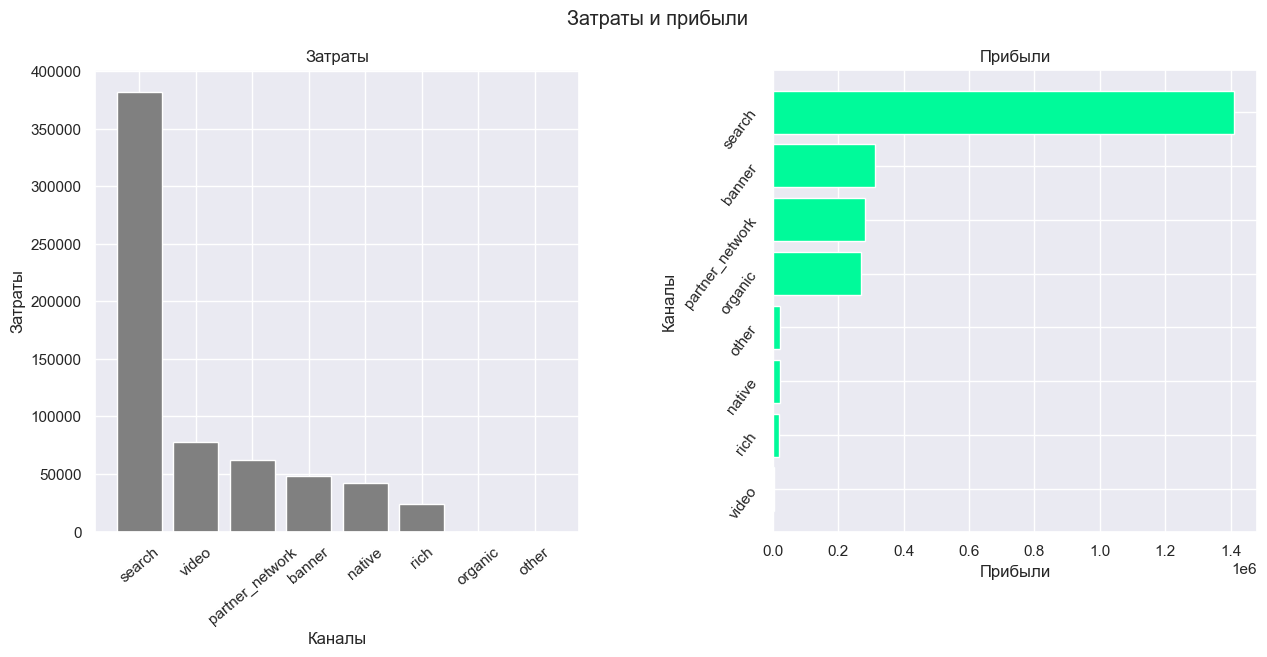

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
fig.suptitle('Затраты и прибыли')
fig.subplots_adjust(wspace=0.4)

ax[0].bar(grouped['ad_channel'], grouped['price'], color='grey')
ax[0].set_title('Затраты')
ax[0].set_xlabel('Каналы')
ax[0].set_ylabel('Затраты')
ax[0].set_xticklabels(grouped['ad_channel'], rotation=40)

ax[1].barh(profits['ad_channel'], profits['profit'], color='mediumspringgreen')
ax[1].set_title('Прибыли')
ax[1].set_xlabel('Прибыли')
ax[1].set_ylabel('Каналы')
ax[1].set_yticklabels(profits['ad_channel'], rotation=53)

plt.show()

Из этих графиков видно, что канал video действительно является бесполезным, т.к. он второй по затратности, но практически нулевой по доходности

##Распределение операционной системы пользователя для каждого канала коммуникации

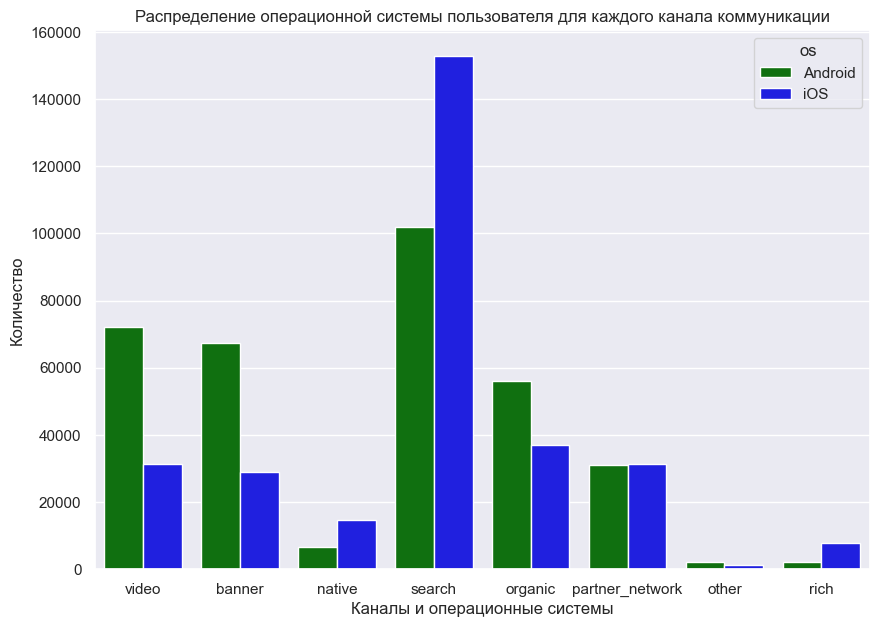

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_new, x='ad_channel', hue='os', palette=['green','blue'])
plt.title('Распределение операционной системы пользователя для каждого канала коммуникации')
plt.xlabel('Каналы и операционные системы')
plt.ylabel('Количество')
plt.show()

Вывод: Люди с IOS чаще переходят по платному поиску, большому баннеру или нативному баннеру, нежели по другим каналам. Пользователи андроид же, наоборот, чаще переходят по обычным баннерам, видео и органическому траффику. С партнерской сети перехдит практически одинаковое количество пользователей что с ios, что с android

#Модуль 11

##Разеление данных на органический и платный трафик

In [46]:
df_organic = df_new[df_new['ad_channel'] == 'organic']
df_organic.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
9,897013,interest,150000,0.0,Android,organic,0.0
10,242700,interest,150000,0.0,Android,organic,0.0
11,143856,interest,150000,0.0,Android,organic,0.0
12,26717,consideration,150000,0.0,Android,organic,0.0
21,286799,interest,150001,0.0,Android,organic,0.0


In [47]:
df_paid = df_new[df_new['ad_channel'] != 'organic']
df_paid.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,111649,consideration,150000,0.0,Android,video,0.75
1,108759,interest,150000,0.0,Android,banner,0.50
2,991236,interest,150000,0.0,Android,native,2.00
3,387356,interest,150000,0.0,iOS,search,1.50
4,619571,consideration,150000,0.0,iOS,search,1.50


##Сравнение долей пользователей на каждом этапе воронки продаж для двух групп трафика

In [48]:
df_organic['ones'] = 1
organic = df_organic[['funnel_stage', 'ones']].groupby('funnel_stage').sum().sort_values(by='ones', ascending=False).reset_index()
organic['share'] = organic['ones'].apply(lambda x: x/organic['ones'].sum())
organic

C:\Users\Danil\AppData\Local\Temp\ipykernel_2928\1146094866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_organic['ones'] = 1


,funnel_stage,ones,share
0,interest,51410,0.553462
1,consideration,34970,0.376475
2,intent,6140,0.066101
3,purchase,368,0.003962


In [49]:
df_paid['ones'] = 1
paid = df_paid[['funnel_stage', 'ones']].groupby('funnel_stage').sum().sort_values(by='ones', ascending=False).reset_index()
paid['share'] = paid['ones'].apply(lambda x: x/paid['ones'].sum())
paid

C:\Users\Danil\AppData\Local\Temp\ipykernel_2928\1246266034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paid['ones'] = 1


,funnel_stage,ones,share
0,interest,333655,0.605758
1,consideration,186889,0.339301
2,intent,27401,0.049747
3,purchase,2861,0.005194


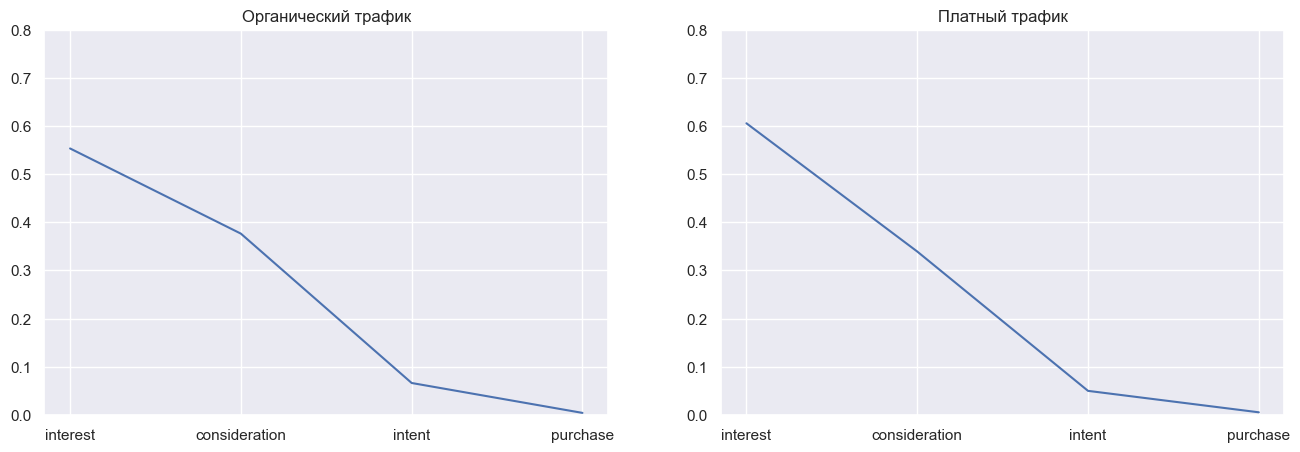

In [50]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,5))

ax[0].plot(organic['funnel_stage'], organic['share'])
ax[0].set_title('Органический трафик')
ax[0].set_ylim(ymin=0, ymax=0.8)

ax[1].plot(paid['funnel_stage'], paid['share'])
ax[1].set_title('Платный трафик')
ax[1].set_ylim(ymin=0, ymax=0.8)
plt.show()

In [51]:
st.chisquare(organic.share, paid.share)

Power_divergenceResult(statistic=0.01425619585534431, pvalue=0.9995492168986879)

В результате можно сделать вывод, что две выборки для платного и органического трафика статистически не отличаются (т.к. pvalue>0.5)

##Воронки для каждого канала коммуникации

In [52]:
stages = ['interest', 'consideration', 'intent', 'purchase']
df_new['funnel_stage'] = pd.Categorical(df_new['funnel_stage'], categories=stages, ordered=True)
df_sorted = df_new.sort_values('funnel_stage')
df_sorted

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
321846,193027,interest,176247,0.0,Android,rich,2.5
369396,1037193,interest,180327,0.0,iOS,search,1.5
369395,600408,interest,180327,0.0,Android,search,1.5
369394,959588,interest,180327,0.0,iOS,search,1.5
369393,812759,interest,180327,0.0,iOS,search,1.5
...,...,...,...,...,...,...,...
590412,903805,purchase,198957,50.0,Android,search,1.5
309892,937217,purchase,175221,2136.0,iOS,search,1.5
634324,990343,purchase,205981,2136.0,iOS,search,1.5
493103,669187,purchase,190786,1099.0,iOS,banner,0.5


In [53]:
df_new[['funnel_stage', 'ad_channel', 'user_id']].groupby(['ad_channel', 'funnel_stage']).count()

user_id
ad_channel      funnel_stage          
banner          interest         59796
                consideration    30942
                intent            5051
                purchase           437
native          interest         12645
                consideration     8089
                intent             254
                purchase            23
organic         interest         51410
                consideration    34970
                intent            6140
                purchase           368
other           interest          2110
                consideration     1175
                intent             152
                purchase            28
partner_network interest         42997
                consideration    16171
                intent            2905
                purchase           291
rich            interest          5745
                consideration     3068
                intent             795
                purchase            11
search          interest        146744
                consideration    87789
                intent           18204
                purchase          2066
video           interest         63618
                consideration    39655
                intent              40
                purchase             5

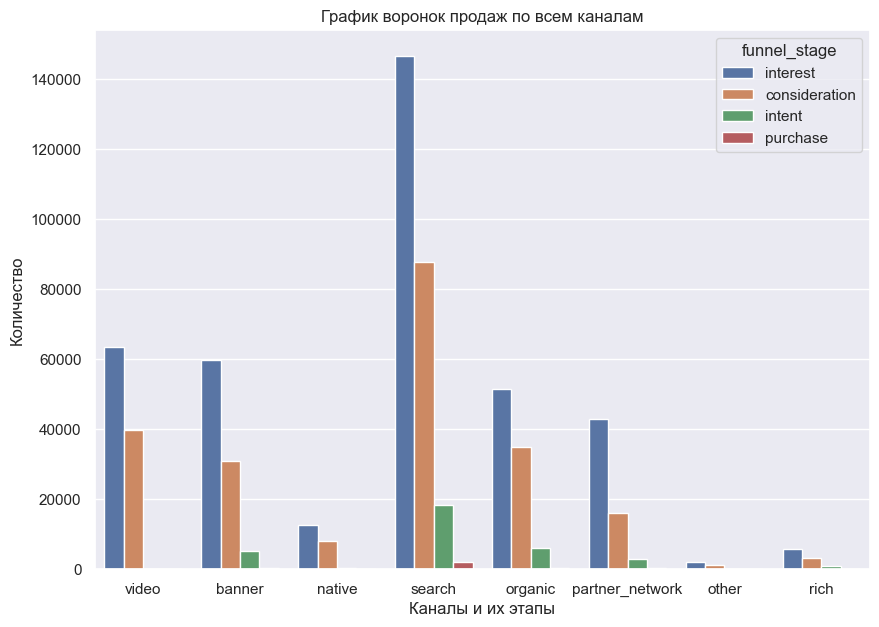

In [54]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_new, x='ad_channel', hue='funnel_stage')
plt.title('График воронок продаж по всем каналам')
plt.xlabel('Каналы и их этапы')
plt.ylabel('Количество')
plt.show()

##Выводы

Отключить стоит канал video, так как он второй по затратности, а прибыль у него практически нулевая. Возможно стоит больше вкладываться в канал search или канал banner, т.к. они имеют хорошую доходность, а канал banner и по затратам не особо дорогой.